<a href="https://colab.research.google.com/github/EmmarieR/CNM-DeepDive-Data-Science-Projects/blob/main/Kaggle_movies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#top

This notebook will be dedicated to messing around with the Kaggle movies dataset: [link](https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset)

Let's use this data to help test out models, data-cleaning techniques, or validation calculations in order to get an idea of what do do for real

# installs and imports

In [ ]:
!pip install kaggle

In [ ]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns

import requests
from bs4 import BeautifulSoup

from textblob import TextBlob

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

import gzip
from io import BytesIO, TextIOWrapper
from urllib.parse import urljoin

## call in kaggle api


referencing this link for API install instructions: [link](https://colab.research.google.com/github/corrieann/kaggle/blob/master/kaggle_api_in_colab.ipynb#scrollTo=0HtGf0HEXEa5)

Above, run the !pip install kagggle cell in order to download kaggle packages from internet.
I am calling in the Kaggle API down here in order to access the dataset without downloading it. If you need to access the dataset yourself, log into kaggle, go to your profile, then your account settings. Scroll until you see the create new token button. Click it and it will start the download of your JSON credential. You need this credential file in order to proceed with the API.

##import kaggle key here

Run the code cell below to initialize the API. Below the code cell, a file upload button will appear. Click it, and upload your kaggle.JSON credential when prompted. Run the following code cell to check proper connection. All is good if there are no errors.



In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.config/kaggle/ && mv kaggle.json ~/.config/kaggle/ && chmod 600 ~/.config/kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 67 bytes


In [ ]:
from kaggle.api.kaggle_api_extended import KaggleApi

In [ ]:
# check authentification
api = KaggleApi()
api.authenticate()

In [ ]:
# import movie dataset from kaggle site
api.dataset_download_files('rounakbanik/the-movies-dataset', unzip=True)

Dataset URL: https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset


the code cell above downloads the csv files directly to this notebook, now they can be manipulated and read in as dataframes.

# clean datasets

In [ ]:
# check sizes of movie CSVs
!ls -lh movies_metadata.csv credits.csv keywords.csv links.csv links_small.csv ratings.csv ratings_small.csv

-rw-r--r-- 1 root root 182M Jun 13 20:58 credits.csv
-rw-r--r-- 1 root root 6.0M Jun 13 20:58 keywords.csv
-rw-r--r-- 1 root root 966K Jun 13 20:58 links.csv
-rw-r--r-- 1 root root 180K Jun 13 20:58 links_small.csv
-rw-r--r-- 1 root root  33M Jun 13 20:58 movies_metadata.csv
-rw-r--r-- 1 root root 677M Jun 13 20:58 ratings.csv
-rw-r--r-- 1 root root 2.4M Jun 13 20:58 ratings_small.csv


In [ ]:
# call CSVs to variables
movies_csv = 'movies_metadata.csv'
credits_csv = 'credits.csv'
keywords_csv = 'keywords.csv'
links_csv = 'links.csv'

In [ ]:
# load in CSVs to dataframes
movies_df = pd.read_csv(movies_csv)
credits_df = pd.read_csv(credits_csv)
keywords_df = pd.read_csv(keywords_csv)
links_df = pd.read_csv(links_csv)

<ipython-input-9-3629295457>:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies_df = pd.read_csv(movies_csv)


In [ ]:
# print column names
print(f'columns in movies_df {movies_df.columns}')
print(f'columns in credits_df {credits_df.columns}')
print(f'columns in keywords_df {keywords_df.columns}')
print(f'columns in links_df {links_df.columns}')

# print shape
print(f'shape of movies_df {movies_df.shape}')
print(f'shape of credits_df {credits_df.shape}')
print(f'shape of keywords_df {keywords_df.shape}')
print(f'shape of links_df {links_df.shape}')

columns in movies_df Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')
columns in credits_df Index(['cast', 'crew', 'id'], dtype='object')
columns in keywords_df Index(['id', 'keywords'], dtype='object')
columns in links_df Index(['movieId', 'imdbId', 'tmdbId'], dtype='object')
shape of movies_df (45466, 24)
shape of credits_df (45476, 3)
shape of keywords_df (46419, 2)
shape of links_df (45843, 3)


In [ ]:
# print df memory in kb
print(f'movies_df memory: {movies_df.memory_usage(deep=True).sum() / 1024} kb')
print(f'credits_df memory: {credits_df.memory_usage(deep=True).sum() / 1024} kb')
print(f'keywords_df memory: {keywords_df.memory_usage(deep=True).sum() / 1024} kb')
print(f'links_df memory: {links_df.memory_usage(deep=True).sum() / 1024} kb')

movies_df memory: 81548.7958984375 kb
credits_df memory: 198530.05078125 kb
keywords_df memory: 8656.1376953125 kb
links_df memory: 1074.57421875 kb


In [ ]:
print(movies_df.dtypes)
print(credits_df.dtypes)
print(keywords_df.dtypes)
print(links_df.dtypes)

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object
cast    object
crew    object
id       int64
dtype: object
id           int64
keywords    object
dtype: object
movieId      int64
imdbId       int64
tmdbId     float64
dtype: object


## data cleaning

### movies df

In [ ]:
movies_df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


edit: found a mis-entry in the df down below. Essentially one of the movies data is downshifted in the columns. Let's fix it here.

In [ ]:
# look for distorted data rows
for index, row in movies_df.iterrows():
  # check for True or False values in adult column
  if row['adult'] != 'True' and row['adult'] != 'False':
    print(f'row index: {index}')
    print(row)

row index: 19730
adult                                                   - Written by Ørnås
belongs_to_collection                                             0.065736
budget                                    /ff9qCepilowshEtG2GYWwzt2bs4.jpg
genres                   [{'name': 'Carousel Productions', 'id': 11176}...
homepage                 [{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...
id                                                              1997-08-20
imdb_id                                                                  0
original_language                                                    104.0
original_title                    [{'iso_639_1': 'en', 'name': 'English'}]
overview                                                          Released
popularity                                                             NaN
poster_path                                                   Midnight Man
production_companies                                                 False
producti

In [ ]:
# delete these entries
movies_df.drop([19730, 29503, 35587], axis=0, inplace=True)

In [ ]:
# drop homepage, status
movies_df.drop(['homepage', 'status', 'video'], axis=1, inplace=True)
movies_df.head()

,adult,belongs_to_collection,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,...,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,tagline,title,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,...,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",NaN,Toy Story,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,...,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,...,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,...,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Friends are the people who let you be yourself...,Waiting to Exhale,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,...,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173.0


In [ ]:
# check for nulls in columns
movies_df.isnull().sum().sort_values(ascending=False)

,0
belongs_to_collection,40972
tagline,25051
overview,954
poster_path,386
runtime,260
release_date,87
imdb_id,17
original_language,11
revenue,3
spoken_languages,3


In [ ]:
# drop columns for collection, tagline, overview, and poster path, popularity and runtime.
movies_df.drop(['belongs_to_collection', 'tagline', 'overview', 'poster_path', 'popularity', 'runtime'], axis=1, inplace=True)
movies_df.head()

,adult,budget,genres,id,imdb_id,original_language,original_title,production_companies,production_countries,release_date,revenue,spoken_languages,title,vote_average,vote_count
0,False,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,en,Toy Story,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Toy Story,7.7,5415.0
1,False,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,en,Jumanji,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Jumanji,6.9,2413.0
2,False,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,en,Grumpier Old Men,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Grumpier Old Men,6.5,92.0
3,False,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,en,Waiting to Exhale,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Waiting to Exhale,6.1,34.0
4,False,0,"[{'id': 35, 'name': 'Comedy'}]",11862,tt0113041,en,Father of the Bride Part II,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Father of the Bride Part II,5.7,173.0


In [ ]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45463 entries, 0 to 45465
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   adult                 45463 non-null  object 
 1   budget                45463 non-null  object 
 2   genres                45463 non-null  object 
 3   id                    45463 non-null  object 
 4   imdb_id               45446 non-null  object 
 5   original_language     45452 non-null  object 
 6   original_title        45463 non-null  object 
 7   production_companies  45460 non-null  object 
 8   production_countries  45460 non-null  object 
 9   release_date          45376 non-null  object 
 10  revenue               45460 non-null  float64
 11  spoken_languages      45460 non-null  object 
 12  title                 45460 non-null  object 
 13  vote_average          45460 non-null  float64
 14  vote_count            45460 non-null  float64
dtypes: float64(3), object(12

cool, that shaved off about 3 Mb

let's take another look at the nulls

In [ ]:
movies_df.isnull().sum().sort_values(ascending=False)

,0
release_date,87
imdb_id,17
original_language,11
revenue,3
production_countries,3
production_companies,3
spoken_languages,3
vote_average,3
title,3
vote_count,3


let's delete rows that have nulls in release date, original language, popularity, revenue, production countries, companies, spoken languages, vote ave, title, vote count. We can fill in for imdb_ids later.

In [ ]:
# remove rows with nulls
movies_df.dropna(subset=['release_date',
                         'imdb_id',
                         'original_language',
                         'revenue',
                         'production_countries',
                         'production_companies',
                         'spoken_languages',
                         'vote_average',
                         'title',
                         'vote_count'], inplace=True)
movies_df.isnull().sum().sort_values(ascending=False)

,0
adult,0
budget,0
genres,0
id,0
imdb_id,0
original_language,0
original_title,0
production_companies,0
production_countries,0
release_date,0


In [ ]:
movies_df.describe()

,revenue,vote_average,vote_count
count,4.535100e+04,45351.000000,45351.000000
mean,1.123629e+07,5.625109,110.153778
std,6.440716e+07,1.913927,491.872273
min,0.000000e+00,0.000000,0.000000
25%,0.000000e+00,5.000000,3.000000
50%,0.000000e+00,6.000000,10.000000
75%,0.000000e+00,6.800000,34.000000
max,2.787965e+09,10.000000,14075.000000


last thing, let's convert all of the imbd_ids to strings and get rid of the 'tt' at the beginning of the id number.

In [ ]:
# convert imbd_id to string
movies_df['imdb_id'] = movies_df['imdb_id'].astype(str)

# remove the 'tt' at the beginning of the id#
movies_df['imdb_id'] = movies_df['imdb_id'].str.replace('tt', '', regex=False)
movies_df.head()

,adult,budget,genres,id,imdb_id,original_language,original_title,production_companies,production_countries,release_date,revenue,spoken_languages,title,vote_average,vote_count
0,False,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,0114709,en,Toy Story,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Toy Story,7.7,5415.0
1,False,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,0113497,en,Jumanji,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Jumanji,6.9,2413.0
2,False,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,0113228,en,Grumpier Old Men,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Grumpier Old Men,6.5,92.0
3,False,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,0114885,en,Waiting to Exhale,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Waiting to Exhale,6.1,34.0
4,False,0,"[{'id': 35, 'name': 'Comedy'}]",11862,0113041,en,Father of the Bride Part II,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Father of the Bride Part II,5.7,173.0


In [ ]:
# show metadata
movies_df.describe(include = 'all')

,adult,budget,genres,id,imdb_id,original_language,original_title,production_companies,production_countries,release_date,revenue,spoken_languages,title,vote_average,vote_count
count,45351,45351,45351,45351,45351,45351,45351,45351,45351,45351,4.535100e+04,45351,45351,45351.000000,45351.000000
unique,2,1223,4063,45321,45321,89,43265,22697,2388,17329,NaN,1929,42174,NaN,NaN
top,False,0,"[{'id': 18, 'name': 'Drama'}]",141971,1180333,en,Hamlet,[],"[{'iso_3166_1': 'US', 'name': 'United States o...",2008-01-01,NaN,"[{'iso_639_1': 'en', 'name': 'English'}]",Cinderella,NaN,NaN
freq,45343,36466,4997,3,3,32192,8,11785,17840,136,NaN,22375,11,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.123629e+07,NaN,NaN,5.625109,110.153778
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.440716e+07,NaN,NaN,1.913927,491.872273
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,5.000000,3.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,6.000000,10.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,6.800000,34.000000


In [ ]:
# convert budget,  vote average to floats
movies_df['budget'] = movies_df['budget'].astype(np.float32)
movies_df['vote_average'] = movies_df['vote_average'].astype(np.float32)

# convert release date to date data type
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'])

# convert adult to binary number encoded columns and int16
movies_df['adult'] = movies_df['adult'].map({'True': 1, 'False': 0})
movies_df['adult'] = movies_df['adult'].astype(np.int16)

# convert id, imbd_id, vote count to int
movies_df['id'] = movies_df['id'].astype(np.int32)
movies_df['imdb_id'] = movies_df['imdb_id'].astype(np.int32)
movies_df['vote_count'] = movies_df['vote_count'].astype(np.int32)
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45351 entries, 0 to 45465
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   adult                 45351 non-null  int16         
 1   budget                45351 non-null  float32       
 2   genres                45351 non-null  object        
 3   id                    45351 non-null  int32         
 4   imdb_id               45351 non-null  int32         
 5   original_language     45351 non-null  object        
 6   original_title        45351 non-null  object        
 7   production_companies  45351 non-null  object        
 8   production_countries  45351 non-null  object        
 9   release_date          45351 non-null  datetime64[ns]
 10  revenue               45351 non-null  float64       
 11  spoken_languages      45351 non-null  object        
 12  title                 45351 non-null  object        
 13  vote_average         

In [ ]:
# show metadata
movies_df.describe()

,adult,budget,id,imdb_id,release_date,revenue,vote_average,vote_count
count,45351.000000,45351.0,45351.000000,4.535100e+04,45351,4.535100e+04,45351.000000,45351.000000
mean,0.000176,4234915.0,107983.369981,9.909051e+05,1992-05-16 12:17:21.158960128,1.123629e+07,5.625108,110.153778
min,0.000000,0.0,2.000000,1.000000e+00,1874-12-09 00:00:00,0.000000e+00,0.000000,0.000000
25%,0.000000,0.0,26377.000000,8.293350e+04,1978-10-06 00:00:00,0.000000e+00,5.000000,3.000000
50%,0.000000,0.0,59839.000000,2.826950e+05,2001-08-30 00:00:00,0.000000e+00,6.000000,10.000000
75%,0.000000,0.0,156347.500000,1.535108e+06,2010-12-17 00:00:00,0.000000e+00,6.800000,34.000000
max,1.000000,380000000.0,469172.000000,7.158814e+06,2020-12-16 00:00:00,2.787965e+09,10.000000,14075.000000
std,0.013281,17440188.0,112137.474456,1.360463e+06,NaN,6.440716e+07,1.913935,491.872273


let's also extract the movie names with the corresponding ids to a separate df for now.

In [ ]:
# new df of movie title, imbd_id, tmbdId
movie_names = movies_df[['title', 'imdb_id', 'imdb_id']]
movie_names.head()

,title,imdb_id,imdb_id
0,Toy Story,114709,114709
1,Jumanji,113497,113497
2,Grumpier Old Men,113228,113228
3,Waiting to Exhale,114885,114885
4,Father of the Bride Part II,113041,113041


In [ ]:
# drop movie title from movies_df
movies_df.drop(['title'], axis=1, inplace=True)
movies_df.head()

,adult,budget,genres,id,imdb_id,original_language,original_title,production_companies,production_countries,release_date,revenue,spoken_languages,vote_average,vote_count
0,0,30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,114709,en,Toy Story,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,"[{'iso_639_1': 'en', 'name': 'English'}]",7.7,5415
1,0,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,113497,en,Jumanji,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",6.9,2413
2,0,0.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,113228,en,Grumpier Old Men,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,"[{'iso_639_1': 'en', 'name': 'English'}]",6.5,92
3,0,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,114885,en,Waiting to Exhale,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,"[{'iso_639_1': 'en', 'name': 'English'}]",6.1,34
4,0,0.0,"[{'id': 35, 'name': 'Comedy'}]",11862,113041,en,Father of the Bride Part II,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,"[{'iso_639_1': 'en', 'name': 'English'}]",5.7,173


### credits df

In [ ]:
credits_df.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [ ]:
# convert id to int32
credits_df['id'] = credits_df['id'].astype(np.int32)
credits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cast    45476 non-null  object
 1   crew    45476 non-null  object
 2   id      45476 non-null  int32 
dtypes: int32(1), object(2)
memory usage: 888.3+ KB


looks like JSON to me, we will leave it as is for now

### keywords df

In [ ]:
keywords_df.head()

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [ ]:
# convert id to int32
keywords_df['id'] = keywords_df['id'].astype(np.int32)
keywords_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46419 entries, 0 to 46418
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        46419 non-null  int32 
 1   keywords  46419 non-null  object
dtypes: int32(1), object(1)
memory usage: 544.1+ KB


more JSON, not touching this right now

### links df

In [ ]:
links_df.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [ ]:
# check for nulls
links_df.isnull().sum()

,0
movieId,0
imdbId,0
tmdbId,219


In [ ]:
# delete nulls
links_df.dropna(inplace=True)
links_df.isnull().sum()

,0
movieId,0
imdbId,0
tmdbId,0


In [ ]:
# convert all columns to int32
links_df['movieId'] = links_df['movieId'].astype(np.int32)
links_df['imdbId'] = links_df['imdbId'].astype(np.int32)
links_df['tmdbId'] = links_df['tmdbId'].astype(np.int32)
links_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45624 entries, 0 to 45842
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   movieId  45624 non-null  int32
 1   imdbId   45624 non-null  int32
 2   tmdbId   45624 non-null  int32
dtypes: int32(3)
memory usage: 891.1 KB


In [ ]:
# prints shapes of links
print(links_df.shape)

(45624, 3)


In [ ]:
# rename link_df imbdid to imbd_id
links_df.rename(columns={'imdbId': 'imdb_id'}, inplace=True)
links_df.head()

,movieId,imdb_id,tmdbId
0,1,114709,862
1,2,113497,8844
2,3,113228,15602
3,4,114885,31357
4,5,113041,11862


In [ ]:
# drop movieId column
links_df.drop(['movieId'], axis=1, inplace=True)
links_df.head()

,imdb_id,tmdbId
0,114709,862
1,113497,8844
2,113228,15602
3,114885,31357
4,113041,11862


# merge

So we have some issues with the ID columns not being consistent across the 4 data frames. Let's fix some of the ID column names and start merging some of the datasets together.

In [ ]:
# list columns of each df
print(movies_df.columns)
print(credits_df.columns)
print(keywords_df.columns)
print(links_df.columns)

Index(['adult', 'budget', 'genres', 'id', 'imdb_id', 'original_language',
       'original_title', 'production_companies', 'production_countries',
       'release_date', 'revenue', 'spoken_languages', 'vote_average',
       'vote_count'],
      dtype='object')
Index(['cast', 'crew', 'id'], dtype='object')
Index(['id', 'keywords'], dtype='object')
Index(['imdb_id', 'tmdbId'], dtype='object')


In [ ]:
# make list of dfs
dfs = [movies_df, credits_df, keywords_df, links_df]

# describe each df
for df in dfs:
  print(df.describe())

              adult       budget             id       imdb_id  \
count  45351.000000      45351.0   45351.000000  4.535100e+04   
mean       0.000176    4234915.0  107983.369981  9.909051e+05   
min        0.000000          0.0       2.000000  1.000000e+00   
25%        0.000000          0.0   26377.000000  8.293350e+04   
50%        0.000000          0.0   59839.000000  2.826950e+05   
75%        0.000000          0.0  156347.500000  1.535108e+06   
max        1.000000  380000000.0  469172.000000  7.158814e+06   
std        0.013281   17440188.0  112137.474456  1.360463e+06   

                        release_date       revenue  vote_average    vote_count  
count                          45351  4.535100e+04  45351.000000  45351.000000  
mean   1992-05-16 12:17:21.158960128  1.123629e+07      5.625108    110.153778  
min              1874-12-09 00:00:00  0.000000e+00      0.000000      0.000000  
25%              1978-10-06 00:00:00  0.000000e+00      5.000000      3.000000  
50%      

looks like the id columns in movies, credits, and keywords are tmbdIds. Let's rename those to match links 'tmbdId'

In [ ]:
# rename id columns in movies_df, credits_df, and keywords_df.
movies_df.rename(columns={'id': 'tmdbId'}, inplace=True)
credits_df.rename(columns={'id': 'tmdbId'}, inplace=True)
keywords_df.rename(columns={'id': 'tmdbId'}, inplace=True)

In [ ]:
# print info for dfs
for df in dfs:
  print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 45351 entries, 0 to 45465
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   adult                 45351 non-null  int16         
 1   budget                45351 non-null  float32       
 2   genres                45351 non-null  object        
 3   tmdbId                45351 non-null  int32         
 4   imdb_id               45351 non-null  int32         
 5   original_language     45351 non-null  object        
 6   original_title        45351 non-null  object        
 7   production_companies  45351 non-null  object        
 8   production_countries  45351 non-null  object        
 9   release_date          45351 non-null  datetime64[ns]
 10  revenue               45351 non-null  float64       
 11  spoken_languages      45351 non-null  object        
 12  vote_average          45351 non-null  float32       
 13  vote_count           

## movies - credits - keywords - links df

Now let's merge everything on the tmdbId.

In [ ]:
# merge the all the dfs
kaggle_movies = pd.merge(movies_df, credits_df, on='tmdbId')
kaggle_movies = pd.merge(kaggle_movies, keywords_df, on='tmdbId')
kaggle_movies = pd.merge(kaggle_movies, links_df, on='tmdbId')
kaggle_movies.head()

,adult,budget,genres,tmdbId,imdb_id_x,original_language,original_title,production_companies,production_countries,release_date,revenue,spoken_languages,vote_average,vote_count,cast,crew,keywords,imdb_id_y
0,0,30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,114709,en,Toy Story,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,"[{'iso_639_1': 'en', 'name': 'English'}]",7.7,5415,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...",114709
1,0,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,113497,en,Jumanji,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",6.9,2413,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[{'id': 10090, 'name': 'board game'}, {'id': 1...",113497
2,0,0.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,113228,en,Grumpier Old Men,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,"[{'iso_639_1': 'en', 'name': 'English'}]",6.5,92,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...","[{'id': 1495, 'name': 'fishing'}, {'id': 12392...",113228
3,0,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,114885,en,Waiting to Exhale,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,"[{'iso_639_1': 'en', 'name': 'English'}]",6.1,34,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...","[{'id': 818, 'name': 'based on novel'}, {'id':...",114885
4,0,0.0,"[{'id': 35, 'name': 'Comedy'}]",11862,113041,en,Father of the Bride Part II,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,"[{'iso_639_1': 'en', 'name': 'English'}]",5.7,173,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...","[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n...",113041


In [ ]:
# drop imbd_id_y and id
kaggle_movies.drop(['imdb_id_y'], axis=1, inplace=True)

# rename imbd_id_x to imbd_id
kaggle_movies.rename(columns={'imdb_id_x': 'imdb_id'}, inplace=True)
kaggle_movies.head()

,adult,budget,genres,tmdbId,imdb_id,original_language,original_title,production_companies,production_countries,release_date,revenue,spoken_languages,vote_average,vote_count,cast,crew,keywords
0,0,30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,114709,en,Toy Story,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,"[{'iso_639_1': 'en', 'name': 'English'}]",7.7,5415,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,0,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,113497,en,Jumanji,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",6.9,2413,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,0,0.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,113228,en,Grumpier Old Men,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,"[{'iso_639_1': 'en', 'name': 'English'}]",6.5,92,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...","[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,0,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,114885,en,Waiting to Exhale,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,"[{'iso_639_1': 'en', 'name': 'English'}]",6.1,34,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...","[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,0,0.0,"[{'id': 35, 'name': 'Comedy'}]",11862,113041,en,Father of the Bride Part II,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,"[{'iso_639_1': 'en', 'name': 'English'}]",5.7,173,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...","[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [ ]:
import ast
# This function will extract an element within a Python literal representation of a list of dictionaries
def extract_json_fields(literal_list_str, field_name):
  '''
  This function can pull an individual item within a Python literal list of dictionaries.
  It takes the following arguments:
  - A string containing a Python literal representation of a list of dictionaries.
  - The name of the item (key) to extract from each dictionary.
  '''
  # Check if the input is a non-empty string
  if isinstance(literal_list_str, str) and literal_list_str:
    try:
      # Use ast.literal_eval to safely parse the Python literal string
      entry_list = ast.literal_eval(literal_list_str)
      # Ensure entry_list is a list and contains dictionaries
      if isinstance(entry_list, list) and all(isinstance(item, dict) for item in entry_list):
        return '|'.join([ str(element.get(field_name, '')) for element in entry_list ])
      else:
        # Handle cases where the literal is valid but not a list of dictionaries
        return ''
    except (ValueError, SyntaxError, TypeError):
      # Handle cases where the string is not a valid Python literal
      return ''
  else:
    # Handle non-string or empty inputs
    return ''

In [ ]:
# call list of columns to interpret
columns = ['genres', 'production_countries', 'production_companies', 'spoken_languages', 'cast', 'crew', 'keywords']

# use function to interpret literals and extract names
for column in columns:
  kaggle_movies[f'{column}_name_ex'] = kaggle_movies[column].apply(extract_json_fields, field_name='name')

In [ ]:
kaggle_movies.head()

,adult,budget,genres,tmdbId,imdb_id,original_language,original_title,production_companies,production_countries,release_date,...,cast,crew,keywords,genres_name_ex,production_countries_name_ex,production_companies_name_ex,spoken_languages_name_ex,cast_name_ex,crew_name_ex,keywords_name_ex
0,0,30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,114709,en,Toy Story,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,...,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...",Animation|Comedy|Family,United States of America,Pixar Animation Studios,English,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter|Joss Whedon|Andrew Stanton|Joel ...,jealousy|toy|boy|friendship|friends|rivalry|bo...
1,0,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,113497,en,Jumanji,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,...,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[{'id': 10090, 'name': 'board game'}, {'id': 1...",Adventure|Fantasy|Family,United States of America,TriStar Pictures|Teitler Film|Interscope Commu...,English|Français,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Larry J. Franco|Jonathan Hensleigh|James Horne...,board game|disappearance|based on children's b...
2,0,0.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,113228,en,Grumpier Old Men,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,...,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...","[{'id': 1495, 'name': 'fishing'}, {'id': 12392...",Romance|Comedy,United States of America,Warner Bros.|Lancaster Gate,English,Walter Matthau|Jack Lemmon|Ann-Margret|Sophia ...,Howard Deutch|Mark Steven Johnson|Mark Steven ...,fishing|best friend|duringcreditsstinger|old men
3,0,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,114885,en,Waiting to Exhale,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,...,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...","[{'id': 818, 'name': 'based on novel'}, {'id':...",Comedy|Drama|Romance,United States of America,Twentieth Century Fox Film Corporation,English,Whitney Houston|Angela Bassett|Loretta Devine|...,Forest Whitaker|Ronald Bass|Ronald Bass|Ezra S...,based on novel|interracial relationship|single...
4,0,0.0,"[{'id': 35, 'name': 'Comedy'}]",11862,113041,en,Father of the Bride Part II,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,...,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...","[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n...",Comedy,United States of America,Sandollar Productions|Touchstone Pictures,English,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Alan Silvestri|Elliot Davis|Nancy Meyers|Nancy...,baby|midlife crisis|confidence|aging|daughter|...


In [ ]:
kaggle_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46797 entries, 0 to 46796
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   adult                         46797 non-null  int16         
 1   budget                        46797 non-null  float32       
 2   genres                        46797 non-null  object        
 3   tmdbId                        46797 non-null  int32         
 4   imdb_id                       46797 non-null  int32         
 5   original_language             46797 non-null  object        
 6   original_title                46797 non-null  object        
 7   production_companies          46797 non-null  object        
 8   production_countries          46797 non-null  object        
 9   release_date                  46797 non-null  datetime64[ns]
 10  revenue                       46797 non-null  float64       
 11  spoken_languages            

In [ ]:
# delete the original columns
kaggle_movies.drop(['genres', 'production_countries', 'production_companies', 'spoken_languages', 'cast', 'crew', 'keywords'], axis=1, inplace=True)
kaggle_movies.head()

,adult,budget,tmdbId,imdb_id,original_language,original_title,release_date,revenue,vote_average,vote_count,genres_name_ex,production_countries_name_ex,production_companies_name_ex,spoken_languages_name_ex,cast_name_ex,crew_name_ex,keywords_name_ex
0,0,30000000.0,862,114709,en,Toy Story,1995-10-30,373554033.0,7.7,5415,Animation|Comedy|Family,United States of America,Pixar Animation Studios,English,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter|Joss Whedon|Andrew Stanton|Joel ...,jealousy|toy|boy|friendship|friends|rivalry|bo...
1,0,65000000.0,8844,113497,en,Jumanji,1995-12-15,262797249.0,6.9,2413,Adventure|Fantasy|Family,United States of America,TriStar Pictures|Teitler Film|Interscope Commu...,English|Français,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Larry J. Franco|Jonathan Hensleigh|James Horne...,board game|disappearance|based on children's b...
2,0,0.0,15602,113228,en,Grumpier Old Men,1995-12-22,0.0,6.5,92,Romance|Comedy,United States of America,Warner Bros.|Lancaster Gate,English,Walter Matthau|Jack Lemmon|Ann-Margret|Sophia ...,Howard Deutch|Mark Steven Johnson|Mark Steven ...,fishing|best friend|duringcreditsstinger|old men
3,0,16000000.0,31357,114885,en,Waiting to Exhale,1995-12-22,81452156.0,6.1,34,Comedy|Drama|Romance,United States of America,Twentieth Century Fox Film Corporation,English,Whitney Houston|Angela Bassett|Loretta Devine|...,Forest Whitaker|Ronald Bass|Ronald Bass|Ezra S...,based on novel|interracial relationship|single...
4,0,0.0,11862,113041,en,Father of the Bride Part II,1995-02-10,76578911.0,5.7,173,Comedy,United States of America,Sandollar Productions|Touchstone Pictures,English,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Alan Silvestri|Elliot Davis|Nancy Meyers|Nancy...,baby|midlife crisis|confidence|aging|daughter|...


In [ ]:
# look at the contents of the spoken languages names column
kaggle_movies['spoken_languages_name_ex'].value_counts()


,count
spoken_languages_name_ex,
English,22925
,4031
Français,1940
日本語,1370
Italiano,1247
...,...
English|Pусский|Türkçe|Română,1
普通话|English|Español,1
Latin|English|Deutsch|Français|Español,1


In [ ]:
# split extracted columns on the '|'
kaggle_movies['genres_name_ex'] = kaggle_movies['genres_name_ex'].str.split('|')
kaggle_movies['production_countries_name_ex'] = kaggle_movies['production_countries_name_ex'].str.split('|')
kaggle_movies['production_companies_name_ex'] = kaggle_movies['production_companies_name_ex'].str.split('|')
kaggle_movies['spoken_languages_name_ex'] = kaggle_movies['spoken_languages_name_ex'].str.split('|')
kaggle_movies['cast_name_ex'] = kaggle_movies['cast_name_ex'].str.split('|')
kaggle_movies['crew_name_ex'] = kaggle_movies['crew_name_ex'].str.split('|')
kaggle_movies['keywords_name_ex'] = kaggle_movies['keywords_name_ex'].str.split('|')

kaggle_movies.head()

,adult,budget,tmdbId,imdb_id,original_language,original_title,release_date,revenue,vote_average,vote_count,genres_name_ex,production_countries_name_ex,production_companies_name_ex,spoken_languages_name_ex,cast_name_ex,crew_name_ex,keywords_name_ex
0,0,30000000.0,862,114709,en,Toy Story,1995-10-30,373554033.0,7.7,5415,"[Animation, Comedy, Family]",[United States of America],[Pixar Animation Studios],[English],"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...","[John Lasseter, Joss Whedon, Andrew Stanton, J...","[jealousy, toy, boy, friendship, friends, riva..."
1,0,65000000.0,8844,113497,en,Jumanji,1995-12-15,262797249.0,6.9,2413,"[Adventure, Fantasy, Family]",[United States of America],"[TriStar Pictures, Teitler Film, Interscope Co...","[English, Français]","[Robin Williams, Jonathan Hyde, Kirsten Dunst,...","[Larry J. Franco, Jonathan Hensleigh, James Ho...","[board game, disappearance, based on children'..."
2,0,0.0,15602,113228,en,Grumpier Old Men,1995-12-22,0.0,6.5,92,"[Romance, Comedy]",[United States of America],"[Warner Bros., Lancaster Gate]",[English],"[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...","[Howard Deutch, Mark Steven Johnson, Mark Stev...","[fishing, best friend, duringcreditsstinger, o..."
3,0,16000000.0,31357,114885,en,Waiting to Exhale,1995-12-22,81452156.0,6.1,34,"[Comedy, Drama, Romance]",[United States of America],[Twentieth Century Fox Film Corporation],[English],"[Whitney Houston, Angela Bassett, Loretta Devi...","[Forest Whitaker, Ronald Bass, Ronald Bass, Ez...","[based on novel, interracial relationship, sin..."
4,0,0.0,11862,113041,en,Father of the Bride Part II,1995-02-10,76578911.0,5.7,173,[Comedy],[United States of America],"[Sandollar Productions, Touchstone Pictures]",[English],"[Steve Martin, Diane Keaton, Martin Short, Kim...","[Alan Silvestri, Elliot Davis, Nancy Meyers, N...","[baby, midlife crisis, confidence, aging, daug..."


In [ ]:
# drop spoken_languages
kaggle_movies.drop(['spoken_languages_name_ex'], axis=1, inplace=True)
kaggle_movies.head()

,adult,budget,tmdbId,imdb_id,original_language,original_title,release_date,revenue,vote_average,vote_count,genres_name_ex,production_countries_name_ex,production_companies_name_ex,cast_name_ex,crew_name_ex,keywords_name_ex
0,0,30000000.0,862,114709,en,Toy Story,1995-10-30,373554033.0,7.7,5415,"[Animation, Comedy, Family]",[United States of America],[Pixar Animation Studios],"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...","[John Lasseter, Joss Whedon, Andrew Stanton, J...","[jealousy, toy, boy, friendship, friends, riva..."
1,0,65000000.0,8844,113497,en,Jumanji,1995-12-15,262797249.0,6.9,2413,"[Adventure, Fantasy, Family]",[United States of America],"[TriStar Pictures, Teitler Film, Interscope Co...","[Robin Williams, Jonathan Hyde, Kirsten Dunst,...","[Larry J. Franco, Jonathan Hensleigh, James Ho...","[board game, disappearance, based on children'..."
2,0,0.0,15602,113228,en,Grumpier Old Men,1995-12-22,0.0,6.5,92,"[Romance, Comedy]",[United States of America],"[Warner Bros., Lancaster Gate]","[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...","[Howard Deutch, Mark Steven Johnson, Mark Stev...","[fishing, best friend, duringcreditsstinger, o..."
3,0,16000000.0,31357,114885,en,Waiting to Exhale,1995-12-22,81452156.0,6.1,34,"[Comedy, Drama, Romance]",[United States of America],[Twentieth Century Fox Film Corporation],"[Whitney Houston, Angela Bassett, Loretta Devi...","[Forest Whitaker, Ronald Bass, Ronald Bass, Ez...","[based on novel, interracial relationship, sin..."
4,0,0.0,11862,113041,en,Father of the Bride Part II,1995-02-10,76578911.0,5.7,173,[Comedy],[United States of America],"[Sandollar Productions, Touchstone Pictures]","[Steve Martin, Diane Keaton, Martin Short, Kim...","[Alan Silvestri, Elliot Davis, Nancy Meyers, N...","[baby, midlife crisis, confidence, aging, daug..."


In [ ]:
# extract first item from cast name and crew name and put into new column
kaggle_movies['cast_name_ex_1'] = kaggle_movies['cast_name_ex'].str[0]
kaggle_movies['crew_name_ex_1'] = kaggle_movies['crew_name_ex'].str[0]

# extract first item from production countries, companies,
kaggle_movies['production_countries_name_ex_1'] = kaggle_movies['production_countries_name_ex'].str[0]
kaggle_movies['production_companies_name_ex_1'] = kaggle_movies['production_companies_name_ex'].str[0]

# extract first 3 items from keywords
kaggle_movies['keywords_name_ex_1'] = kaggle_movies['keywords_name_ex'].str[:1]
kaggle_movies['keywords_name_ex_2'] = kaggle_movies['keywords_name_ex'].str[1:2]
kaggle_movies['keywords_name_ex_3'] = kaggle_movies['keywords_name_ex'].str[2:3]

# delete original cast name, company, country, keyword, crew name columns
kaggle_movies.drop(['cast_name_ex', 'production_countries_name_ex', 'production_companies_name_ex', 'keywords_name_ex', 'crew_name_ex'], axis=1, inplace=True)
kaggle_movies.head()

,adult,budget,tmdbId,imdb_id,original_language,original_title,release_date,revenue,vote_average,vote_count,genres_name_ex,cast_name_ex_1,crew_name_ex_1,production_countries_name_ex_1,production_companies_name_ex_1,keywords_name_ex_1,keywords_name_ex_2,keywords_name_ex_3
0,0,30000000.0,862,114709,en,Toy Story,1995-10-30,373554033.0,7.7,5415,"[Animation, Comedy, Family]",Tom Hanks,John Lasseter,United States of America,Pixar Animation Studios,[jealousy],[toy],[boy]
1,0,65000000.0,8844,113497,en,Jumanji,1995-12-15,262797249.0,6.9,2413,"[Adventure, Fantasy, Family]",Robin Williams,Larry J. Franco,United States of America,TriStar Pictures,[board game],[disappearance],[based on children's book]
2,0,0.0,15602,113228,en,Grumpier Old Men,1995-12-22,0.0,6.5,92,"[Romance, Comedy]",Walter Matthau,Howard Deutch,United States of America,Warner Bros.,[fishing],[best friend],[duringcreditsstinger]
3,0,16000000.0,31357,114885,en,Waiting to Exhale,1995-12-22,81452156.0,6.1,34,"[Comedy, Drama, Romance]",Whitney Houston,Forest Whitaker,United States of America,Twentieth Century Fox Film Corporation,[based on novel],[interracial relationship],[single mother]
4,0,0.0,11862,113041,en,Father of the Bride Part II,1995-02-10,76578911.0,5.7,173,[Comedy],Steve Martin,Alan Silvestri,United States of America,Sandollar Productions,[baby],[midlife crisis],[confidence]


In [ ]:
# check for nulls
kaggle_movies.isnull().sum()

,0
adult,0
budget,0
tmdbId,0
imdb_id,0
original_language,0
original_title,0
release_date,0
revenue,0
vote_average,0
vote_count,0


## genre encoding

In [ ]:
# make df copy
kaggle_movies_copy = kaggle_movies.copy()

In [ ]:
# recall copy
#kaggle_movies = kaggle_movies_copy

In [ ]:
# one-hot encode genres
genres_exploded = kaggle_movies['genres_name_ex'].explode()
genres_encoder = OneHotEncoder(sparse_output=False) # Initialize the encoder
genres_encoded = genres_encoder.fit_transform(genres_exploded.values.reshape(-1, 1))
genres_df = pd.DataFrame(genres_encoded, index=genres_exploded.index, columns=genres_encoder.get_feature_names_out(['genres']))
genres_df.head()

,genres_,genres_Action,genres_Adventure,genres_Animation,genres_Comedy,genres_Crime,genres_Documentary,genres_Drama,genres_Family,genres_Fantasy,...,genres_History,genres_Horror,genres_Music,genres_Mystery,genres_Romance,genres_Science Fiction,genres_TV Movie,genres_Thriller,genres_War,genres_Western
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# collapse data rows in genres_df by common index
genres_df = genres_df.groupby(genres_df.index).sum()
genres_df.head()

,genres_,genres_Action,genres_Adventure,genres_Animation,genres_Comedy,genres_Crime,genres_Documentary,genres_Drama,genres_Family,genres_Fantasy,...,genres_History,genres_Horror,genres_Music,genres_Mystery,genres_Romance,genres_Science Fiction,genres_TV Movie,genres_Thriller,genres_War,genres_Western
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# join genres_df and kaggle_movies
kaggle_movies = kaggle_movies.join(genres_df)
kaggle_movies.head()

,adult,budget,tmdbId,imdb_id,original_language,original_title,release_date,revenue,vote_average,vote_count,...,genres_History,genres_Horror,genres_Music,genres_Mystery,genres_Romance,genres_Science Fiction,genres_TV Movie,genres_Thriller,genres_War,genres_Western
0,0,30000000.0,862,114709,en,Toy Story,1995-10-30,373554033.0,7.7,5415,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,65000000.0,8844,113497,en,Jumanji,1995-12-15,262797249.0,6.9,2413,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,15602,113228,en,Grumpier Old Men,1995-12-22,0.0,6.5,92,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0,16000000.0,31357,114885,en,Waiting to Exhale,1995-12-22,81452156.0,6.1,34,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0,0.0,11862,113041,en,Father of the Bride Part II,1995-02-10,76578911.0,5.7,173,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Export to parquet

In [ ]:
pip install pandas pyarrow

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# export to parquet to google drive
output_path = '/content/drive/My Drive/my_dataframe.parquet'
kaggle_movies.to_parquet(output_path, engine='pyarrow', compression='snappy')

In [ ]:
!ls -lh "/content/drive/My Drive/my_dataframe.parquet"

-rw------- 1 root root 3.2M Jun 13 21:00 '/content/drive/My Drive/my_dataframe.parquet'


# more data cleaning


In [ ]:
# change genre columns names to drop generes_ and lowercase
kaggle_movies.rename(columns=lambda x: x.replace('genres_', '').lower(), inplace=True)
kaggle_movies.head()

,adult,budget,tmdbid,imdb_id,original_language,original_title,release_date,revenue,vote_average,vote_count,...,history,horror,music,mystery,romance,science fiction,tv movie,thriller,war,western
0,0,30000000.0,862,114709,en,Toy Story,1995-10-30,373554033.0,7.7,5415,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,65000000.0,8844,113497,en,Jumanji,1995-12-15,262797249.0,6.9,2413,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,15602,113228,en,Grumpier Old Men,1995-12-22,0.0,6.5,92,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0,16000000.0,31357,114885,en,Waiting to Exhale,1995-12-22,81452156.0,6.1,34,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0,0.0,11862,113041,en,Father of the Bride Part II,1995-02-10,76578911.0,5.7,173,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# make new columns for release month and day
kaggle_movies['release_month'] = kaggle_movies['release_date'].dt.month
kaggle_movies['release_day'] = kaggle_movies['release_date'].dt.day

# drop release date
kaggle_movies.drop(['release_date'], axis=1, inplace=True)
kaggle_movies.head()

,adult,budget,tmdbid,imdb_id,original_language,original_title,revenue,vote_average,vote_count,name_ex,...,music,mystery,romance,science fiction,tv movie,thriller,war,western,release_month,release_day
0,0,30000000.0,862,114709,en,Toy Story,373554033.0,7.7,5415,"[Animation, Comedy, Family]",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,30
1,0,65000000.0,8844,113497,en,Jumanji,262797249.0,6.9,2413,"[Adventure, Fantasy, Family]",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,15
2,0,0.0,15602,113228,en,Grumpier Old Men,0.0,6.5,92,"[Romance, Comedy]",...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,12,22
3,0,16000000.0,31357,114885,en,Waiting to Exhale,81452156.0,6.1,34,"[Comedy, Drama, Romance]",...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,12,22
4,0,0.0,11862,113041,en,Father of the Bride Part II,76578911.0,5.7,173,[Comedy],...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,10


In [ ]:
kaggle_movies.head().T

,0,1,2,3,4
adult,0,0,0,0,0
budget,30000000.0,65000000.0,0.0,16000000.0,0.0
tmdbid,862,8844,15602,31357,11862
imdb_id,114709,113497,113228,114885,113041
original_language,en,en,en,en,en
original_title,Toy Story,Jumanji,Grumpier Old Men,Waiting to Exhale,Father of the Bride Part II
revenue,373554033.0,262797249.0,0.0,81452156.0,76578911.0
vote_average,7.7,6.9,6.5,6.1,5.7
vote_count,5415,2413,92,34,173
name_ex,"[Animation, Comedy, Family]","[Adventure, Fantasy, Family]","[Romance, Comedy]","[Comedy, Drama, Romance]",[Comedy]


In [ ]:
# drop name_ex
kaggle_movies.drop(['name_ex'], axis=1, inplace=True)
kaggle_movies.head()

,adult,budget,tmdbid,imdb_id,original_language,original_title,revenue,vote_average,vote_count,cast_name_ex_1,...,music,mystery,romance,science fiction,tv movie,thriller,war,western,release_month,release_day
0,0,30000000.0,862,114709,en,Toy Story,373554033.0,7.7,5415,Tom Hanks,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,30
1,0,65000000.0,8844,113497,en,Jumanji,262797249.0,6.9,2413,Robin Williams,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,15
2,0,0.0,15602,113228,en,Grumpier Old Men,0.0,6.5,92,Walter Matthau,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,12,22
3,0,16000000.0,31357,114885,en,Waiting to Exhale,81452156.0,6.1,34,Whitney Houston,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,12,22
4,0,0.0,11862,113041,en,Father of the Bride Part II,76578911.0,5.7,173,Steve Martin,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,10


In [ ]:
# rename unnamed column to other
kaggle_movies.rename(columns={'': 'other'}, inplace=True)
kaggle_movies.head()

,adult,budget,tmdbid,imdb_id,original_language,original_title,revenue,vote_average,vote_count,cast_name_ex_1,...,music,mystery,romance,science fiction,tv movie,thriller,war,western,release_month,release_day
0,0,30000000.0,862,114709,en,Toy Story,373554033.0,7.7,5415,Tom Hanks,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,30
1,0,65000000.0,8844,113497,en,Jumanji,262797249.0,6.9,2413,Robin Williams,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,15
2,0,0.0,15602,113228,en,Grumpier Old Men,0.0,6.5,92,Walter Matthau,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,12,22
3,0,16000000.0,31357,114885,en,Waiting to Exhale,81452156.0,6.1,34,Whitney Houston,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,12,22
4,0,0.0,11862,113041,en,Father of the Bride Part II,76578911.0,5.7,173,Steve Martin,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,10


In [ ]:
# encode language column
kaggle_movies['original_language'] = kaggle_movies['original_language'].astype('category')
kaggle_movies['original_language'] = kaggle_movies['original_language'].cat.codes
kaggle_movies.head()

,adult,budget,tmdbid,imdb_id,original_language,original_title,revenue,vote_average,vote_count,cast_name_ex_1,...,music,mystery,romance,science fiction,tv movie,thriller,war,western,release_month,release_day
0,0,30000000.0,862,114709,17,Toy Story,373554033.0,7.7,5415,Tom Hanks,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,30
1,0,65000000.0,8844,113497,17,Jumanji,262797249.0,6.9,2413,Robin Williams,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,15
2,0,0.0,15602,113228,17,Grumpier Old Men,0.0,6.5,92,Walter Matthau,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,12,22
3,0,16000000.0,31357,114885,17,Waiting to Exhale,81452156.0,6.1,34,Whitney Houston,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,12,22
4,0,0.0,11862,113041,17,Father of the Bride Part II,76578911.0,5.7,173,Steve Martin,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,10


In [ ]:
# encode cast and crew
kaggle_movies['cast_name_ex_1'] = kaggle_movies['cast_name_ex_1'].astype('category')
kaggle_movies['cast_name_ex_1'] = kaggle_movies['cast_name_ex_1'].cat.codes

kaggle_movies['crew_name_ex_1'] = kaggle_movies['crew_name_ex_1'].astype('category')
kaggle_movies['crew_name_ex_1'] = kaggle_movies['crew_name_ex_1'].cat.codes


In [ ]:
kaggle_movies.head()

,adult,budget,tmdbid,imdb_id,original_language,original_title,revenue,vote_average,vote_count,cast_name_ex_1,...,music,mystery,romance,science fiction,tv movie,thriller,war,western,release_month,release_day
0,0,30000000.0,862,114709,17,Toy Story,373554033.0,7.7,5415,16902,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,30
1,0,65000000.0,8844,113497,17,Jumanji,262797249.0,6.9,2413,14693,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,15
2,0,0.0,15602,113228,17,Grumpier Old Men,0.0,6.5,92,17666,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,12,22
3,0,16000000.0,31357,114885,17,Waiting to Exhale,81452156.0,6.1,34,17742,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,12,22
4,0,0.0,11862,113041,17,Father of the Bride Part II,76578911.0,5.7,173,16153,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,10


In [ ]:
# encode companies, countries, and keywords
kaggle_movies['production_companies_name_ex_1'] = kaggle_movies['production_companies_name_ex_1'].astype('category')
kaggle_movies['production_companies_name_ex_1'] = kaggle_movies['production_companies_name_ex_1'].cat.codes

kaggle_movies['production_countries_name_ex_1'] = kaggle_movies['production_countries_name_ex_1'].astype('category')
kaggle_movies['production_countries_name_ex_1'] = kaggle_movies['production_countries_name_ex_1'].cat.codes

# extract string from list for keyword columns
kaggle_movies['keywords_name_ex_1'] = kaggle_movies['keywords_name_ex_1'].str[0]
kaggle_movies['keywords_name_ex_2'] = kaggle_movies['keywords_name_ex_2'].str[0]
kaggle_movies['keywords_name_ex_3'] = kaggle_movies['keywords_name_ex_3'].str[0]

kaggle_movies['keywords_name_ex_1'] = kaggle_movies['keywords_name_ex_1'].astype('category')
kaggle_movies['keywords_name_ex_1'] = kaggle_movies['keywords_name_ex_1'].cat.codes

kaggle_movies['keywords_name_ex_2'] = kaggle_movies['keywords_name_ex_2'].astype('category')
kaggle_movies['keywords_name_ex_2'] = kaggle_movies['keywords_name_ex_2'].cat.codes

kaggle_movies['keywords_name_ex_3'] = kaggle_movies['keywords_name_ex_3'].astype('category')
kaggle_movies['keywords_name_ex_3'] = kaggle_movies['keywords_name_ex_3'].cat.codes

In [ ]:
kaggle_movies.head().T

,0,1,2,3,4
adult,0,0,0,0,0
budget,30000000.0,65000000.0,0.0,16000000.0,0.0
tmdbid,862,8844,15602,31357,11862
imdb_id,114709,113497,113228,114885,113041
original_language,17,17,17,17,17
original_title,Toy Story,Jumanji,Grumpier Old Men,Waiting to Exhale,Father of the Bride Part II
revenue,373554033.0,262797249.0,0.0,81452156.0,76578911.0
vote_average,7.7,6.9,6.5,6.1,5.7
vote_count,5415,2413,92,34,173
cast_name_ex_1,16902,14693,17666,17742,16153


In [ ]:
kaggle_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46797 entries, 0 to 46796
Data columns (total 39 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   adult                           46797 non-null  int16  
 1   budget                          46797 non-null  float32
 2   tmdbid                          46797 non-null  int32  
 3   imdb_id                         46797 non-null  int32  
 4   original_language               46797 non-null  int8   
 5   original_title                  46797 non-null  object 
 6   revenue                         46797 non-null  float64
 7   vote_average                    46797 non-null  float32
 8   vote_count                      46797 non-null  int32  
 9   cast_name_ex_1                  46797 non-null  int16  
 10  crew_name_ex_1                  46797 non-null  int16  
 11  production_countries_name_ex_1  46797 non-null  int16  
 12  production_companies_name_ex_1  

In [ ]:
# drop revenue, vote_count
kaggle_movies.drop(['revenue', 'vote_count'], axis=1, inplace=True)
kaggle_movies.head()

,adult,budget,tmdbid,imdb_id,original_language,original_title,vote_average,cast_name_ex_1,crew_name_ex_1,production_countries_name_ex_1,...,music,mystery,romance,science fiction,tv movie,thriller,war,western,release_month,release_day
0,0,30000000.0,862,114709,17,Toy Story,7.7,16902,9576,138,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,30
1,0,65000000.0,8844,113497,17,Jumanji,6.9,14693,11244,138,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,15
2,0,0.0,15602,113228,17,Grumpier Old Men,6.5,17666,7581,138,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,12,22
3,0,16000000.0,31357,114885,17,Waiting to Exhale,6.1,17742,5880,138,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,12,22
4,0,0.0,11862,113041,17,Father of the Bride Part II,5.7,16153,378,138,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,10


##scaling

In [ ]:
# convert all genre columns to int16
kaggle_movies['action'] = kaggle_movies['action'].astype(np.int16)
kaggle_movies['adventure'] = kaggle_movies['adventure'].astype(np.int16)
kaggle_movies['animation'] = kaggle_movies['animation'].astype(np.int16)
kaggle_movies['comedy'] = kaggle_movies['comedy'].astype(np.int16)
kaggle_movies['crime'] = kaggle_movies['crime'].astype(np.int16)
kaggle_movies['documentary'] = kaggle_movies['documentary'].astype(np.int16)
kaggle_movies['drama'] = kaggle_movies['drama'].astype(np.int16)
kaggle_movies['family'] = kaggle_movies['family'].astype(np.int16)
kaggle_movies['fantasy'] = kaggle_movies['fantasy'].astype(np.int16)
kaggle_movies['history'] = kaggle_movies['history'].astype(np.int16)
kaggle_movies['horror'] = kaggle_movies['horror'].astype(np.int16)
kaggle_movies['music'] = kaggle_movies['music'].astype(np.int16)
kaggle_movies['mystery'] = kaggle_movies['mystery'].astype(np.int16)
kaggle_movies['romance'] = kaggle_movies['romance'].astype(np.int16)
kaggle_movies['science fiction'] = kaggle_movies['science fiction'].astype(np.int16)
kaggle_movies['tv movie'] = kaggle_movies['tv movie'].astype(np.int16)
kaggle_movies['thriller'] = kaggle_movies['thriller'].astype(np.int16)
kaggle_movies['war'] = kaggle_movies['war'].astype(np.int16)
kaggle_movies['western'] = kaggle_movies['western'].astype(np.int16)
kaggle_movies['other'] = kaggle_movies['other'].astype(np.int16)
kaggle_movies['foreign'] = kaggle_movies['foreign'].astype(np.int16)

kaggle_movies.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46797 entries, 0 to 46796
Data columns (total 37 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   adult                           46797 non-null  int16  
 1   budget                          46797 non-null  float32
 2   tmdbid                          46797 non-null  int32  
 3   imdb_id                         46797 non-null  int32  
 4   original_language               46797 non-null  int8   
 5   original_title                  46797 non-null  object 
 6   vote_average                    46797 non-null  float32
 7   cast_name_ex_1                  46797 non-null  int16  
 8   crew_name_ex_1                  46797 non-null  int16  
 9   production_countries_name_ex_1  46797 non-null  int16  
 10  production_companies_name_ex_1  46797 non-null  int16  
 11  keywords_name_ex_1              46797 non-null  int16  
 12  keywords_name_ex_2              

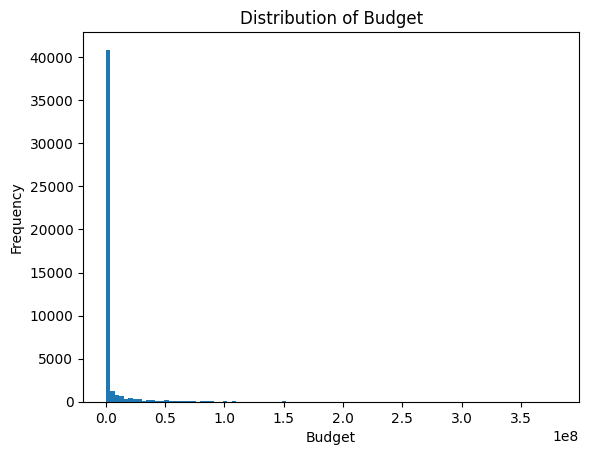

In [ ]:
# distribution of budget
plt.hist(kaggle_movies['budget'], bins=100)
plt.xlabel('Budget')
plt.ylabel('Frequency')
plt.title('Distribution of Budget')
plt.show()

In [ ]:
kaggle_movies['log_budget'] = np.log1p(kaggle_movies['budget'])   # log1p handles log(0) safely

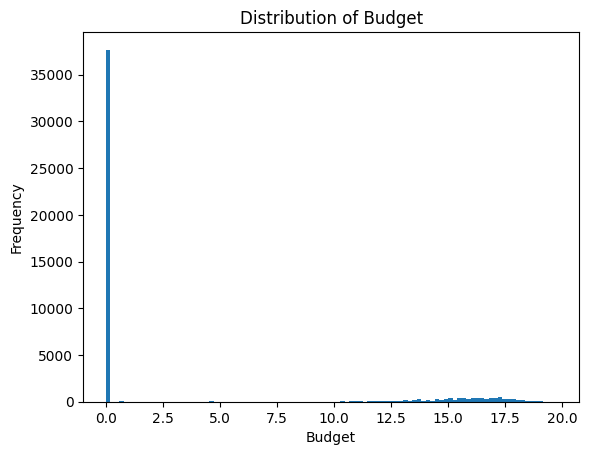

In [ ]:
# distribution of budget
plt.hist(kaggle_movies['log_budget'], bins=100)
plt.xlabel('Budget')
plt.ylabel('Frequency')
plt.title('Distribution of Budget')
plt.show()

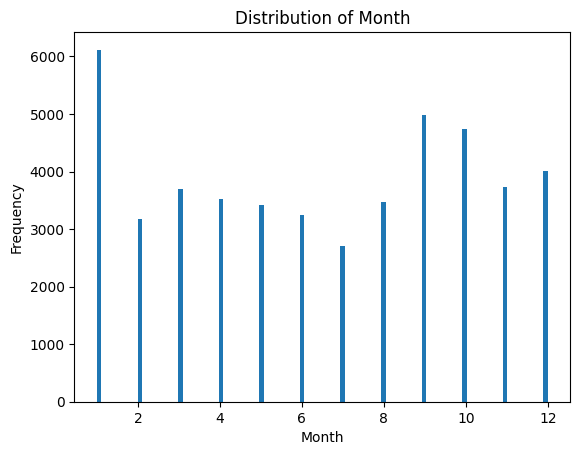

In [ ]:
# distribution of month
plt.hist(kaggle_movies['release_month'], bins=100)
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Distribution of Month')
plt.show()

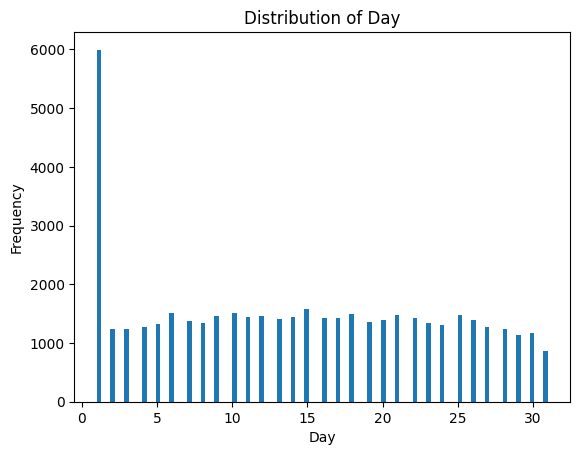

In [ ]:
# distribution of day
plt.hist(kaggle_movies['release_day'], bins=100)
plt.xlabel('Day')
plt.ylabel('Frequency')
plt.title('Distribution of Day')
plt.show()
#

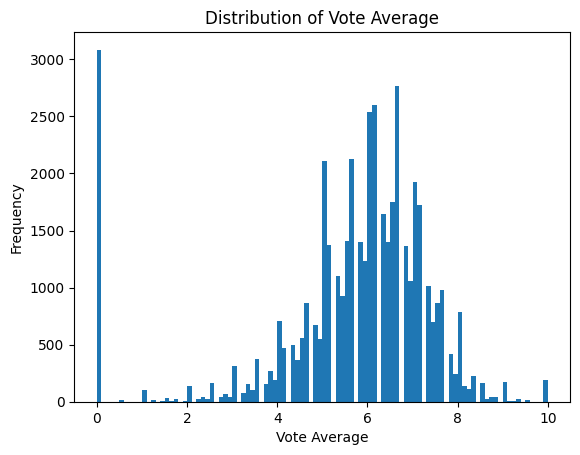

In [ ]:
#distribution of vote average
plt.hist(kaggle_movies['vote_average'], bins=100)
plt.xlabel('Vote Average')
plt.ylabel('Frequency')
plt.title('Distribution of Vote Average')
plt.show()

# Models

##Test and training sets

In [ ]:
kaggle_movies_notitle = kaggle_movies.drop(['original_title', 'tmdbid', 'imdb_id'], axis=1)
kaggle_movies_notitle.head()

,adult,budget,original_language,vote_average,cast_name_ex_1,crew_name_ex_1,production_countries_name_ex_1,production_companies_name_ex_1,keywords_name_ex_1,keywords_name_ex_2,...,mystery,romance,science fiction,tv movie,thriller,war,western,release_month,release_day,log_budget
0,0,30000000.0,17,7.7,16902,9576,138,7334,2135,5494,...,0,0,0,0,0,0,0,10,30,17.216707
1,0,65000000.0,17,6.9,14693,11244,138,9599,458,1524,...,0,0,0,0,0,0,0,12,15,17.989899
2,0,0.0,17,6.5,17666,7581,138,10105,1508,510,...,0,1,0,0,0,0,0,12,22,0.000000
3,0,16000000.0,17,6.1,17742,5880,138,9679,324,2760,...,0,1,0,0,0,0,0,12,22,16.588099
4,0,0.0,17,5.7,16153,378,138,8239,263,3415,...,0,0,0,0,0,0,0,2,10,0.000000


In [ ]:
kaggle_movies_notitle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46797 entries, 0 to 46796
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   adult                           46797 non-null  int16  
 1   budget                          46797 non-null  float32
 2   original_language               46797 non-null  int8   
 3   vote_average                    46797 non-null  float32
 4   cast_name_ex_1                  46797 non-null  int16  
 5   crew_name_ex_1                  46797 non-null  int16  
 6   production_countries_name_ex_1  46797 non-null  int16  
 7   production_companies_name_ex_1  46797 non-null  int16  
 8   keywords_name_ex_1              46797 non-null  int16  
 9   keywords_name_ex_2              46797 non-null  int16  
 10  keywords_name_ex_3              46797 non-null  int16  
 11  other                           46797 non-null  int16  
 12  action                          

In [ ]:
# call target and features
y = kaggle_movies_notitle['vote_average']
X = kaggle_movies_notitle.drop('vote_average', axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## XGBoost

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Create the model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)

# Fit the model
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Predict
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 3.30
R² Score: 0.13


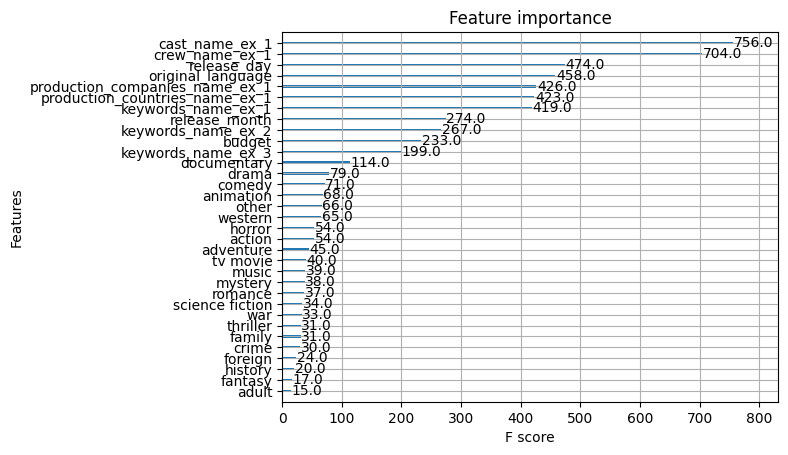

In [ ]:
import matplotlib.pyplot as plt

xgb.plot_importance(model)
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import make_scorer, mean_squared_error
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]}

In [ ]:
# Scoring function (negative MSE or R²)
scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Grid search with 5-fold CV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring=scorer,
    cv=5,
    verbose=1,
    n_jobs=-1
)

In [ ]:
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

# Predict on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
print(f"Test MSE: {mse:.2f}")

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 100, 'subsample': 1.0}
Test MSE: 3.29


In [ ]:
# drop feature columns with f score of less than 100
columns_to_keep = ['documentary', 'keywords_name_ex_3', 'budget', 'keywords_name_ex_2', 'release_month', 'keywords_name_ex_1', 'production_companies_name_ex_1', 'production_countries_name_ex_1', 'cast_name_ex_1', 'crew_name_ex_1', 'original_language', 'release_day']
X_train_filtered = X_train[columns_to_keep]
X_test_filtered = X_test[columns_to_keep]

In [ ]:
model_2 = xgb.XGBRegressor(objective='reg:squarederror',colsample_bytree = 0.8, n_estimators=100, learning_rate=0.1, max_depth=8, subsample = 1.0, random_state=42)
model_2.fit(X_train_filtered, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [6, 8, 10, 12],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0, 2.0],
    'colsample_bytree': [0.8, 1.0, 1.2]}

In [ ]:
grid_search.fit(X_train_filtered, y_train)

print("Best Parameters:", grid_search.best_params_)

# Predict on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_filtered)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
print(f"Test MSE: {mse:.2f}")

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200, 'subsample': 0.8}
Test MSE: 3.40


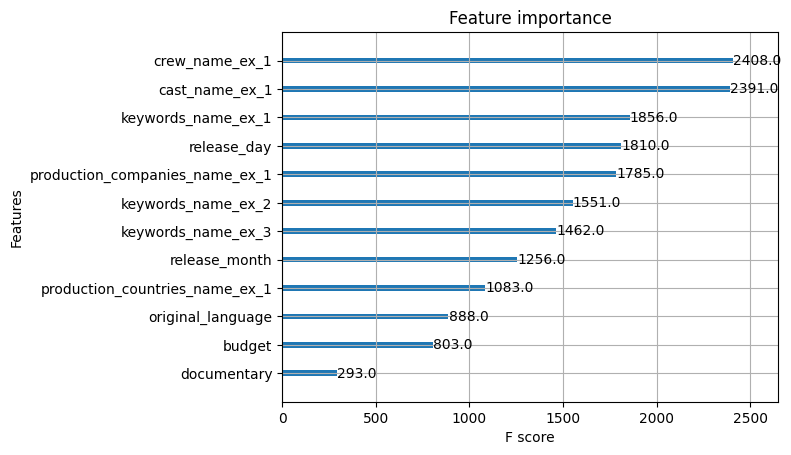

In [ ]:
xgb.plot_importance(model_2)
plt.show()

In [ ]:
# model three, only feature are crew name, cast name, release day, company, keywords1
X_train_filtered = X_train[['crew_name_ex_1', 'cast_name_ex_1', 'release_day', 'production_companies_name_ex_1', 'keywords_name_ex_1', 'keywords_name_ex_2']]
X_test_filtered = X_test[['crew_name_ex_1', 'cast_name_ex_1', 'release_day', 'production_companies_name_ex_1', 'keywords_name_ex_1', 'keywords_name_ex_2']]

In [ ]:
param_grid = {
    'n_estimators': [25, 50, 100, 200, 300, 400],
    'max_depth': [2, 4, 6, 8, 10],
    'learning_rate': [0.01, 0.5, 0.1, 1.5],
    'subsample': [0.6, 0.8, 1.0,],
    'colsample_bytree': [0.6, 0.8, 1.0, 1.2]}

In [ ]:
grid_search.fit(X_train_filtered, y_train)

print("Best Parameters:", grid_search.best_params_)

# Predict on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_filtered)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
print(f"Test MSE: {mse:.2f}")

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200, 'subsample': 1.0}
Test MSE: 3.53


In [ ]:
# log scale targets
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

In [ ]:
# rerun model


## Keras

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(128, activation="gelu", input_shape=(X_train_filtered.shape[1],)), #number of neurons common options 64,128,256,512, think of a neuron as a detector, they stack to detect increasing complex pattterns
    layers.Dense(64, activation="gelu"), #try GELU  for a smoother version of ReLU
    layers.Dense(1)  # Predicting a continuous value (rating)
])

model.compile(optimizer="adam", loss="mse", metrics=["mae"]) #Try RMSProp scales learning rate by moving avg good for RNNs, AdamW variant of Adam with eeigh decay, and better for generalization

# Train the model
history = model.fit(X_train_filtered, y_train_log, validation_data=(X_test_filtered, y_test_log), epochs=100, batch_size=128) #of epochs are the passes through the training data, number of samples before updating weights smaller more genralized and noisy larger could over fit.

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


293/293 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 70376.1328 - mae: 126.1378 - val_loss: 569.0837 - val_mae: 17.9740
Epoch 2/100
293/293 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 463.5642 - mae: 16.2545 - val_loss: 266.3474 - val_mae: 12.1655
Epoch 3/100
293/293 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 241.5488 - mae: 11.6877 - val_loss: 177.7739 - val_mae: 9.7929
Epoch 4/100
293/293 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 167.1634 - mae: 9.6964 - val_loss: 173.2891 - val_mae: 10.0460
Epoch 5/100
293/293 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 140.1418 - mae: 8.9374 - val_loss: 123.7469 - val_mae: 8.1422
Epoch 6/100
293/293 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 105.7970 - mae: 7.6940 - val_loss: 94.7167 - val_mae: 7.3380
Epoch 7/100
293/293 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 94.6813 - mae: 7.2972 - val_loss: 90.3532 - val_mae: 6.9998
Epoch 8/100
293/293 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 84.8722 - mae: 6.9147 - val_loss: 98.9026 - val_mae: 7.5776
Epoch 9/100
293/293 ━━━━

293/293 ━━━━━━━━━━━━━━━━━━━━ 0s 888us/step


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


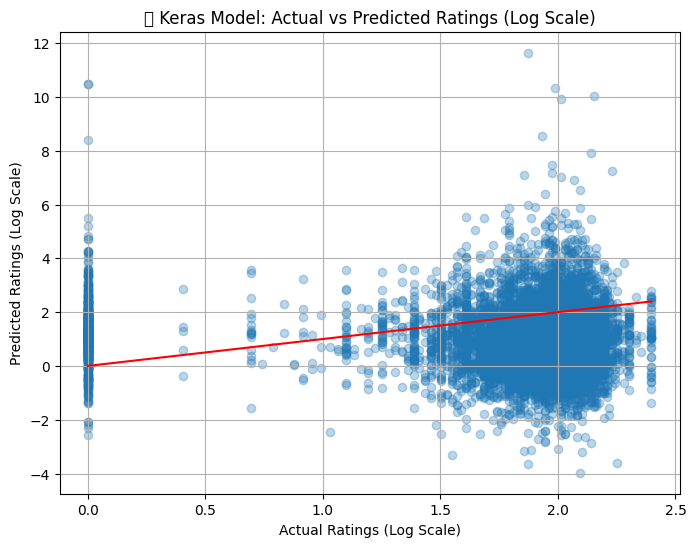

In [ ]:
# Predict ratings
y_pred = model.predict(X_test_filtered).flatten()

# Optional: Compare predictions to actuals
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test_log, y_pred, alpha=0.3)
plt.xlabel("Actual Ratings (Log Scale)")
plt.ylabel("Predicted Ratings (Log Scale)")
plt.title("🎬 Keras Model: Actual vs Predicted Ratings (Log Scale)")
plt.grid(True)
plt.plot([y_test_log.min(), y_test_log.max()], [y_test_log.min(), y_test_log.max()], color='red')
plt.show()